In [59]:
from google.colab import files
uploaded = files.upload()

Saving kbju_targets.json to kbju_targets.json
Saving weekly_menu.json to weekly_menu.json


In [136]:
import json
import pandas as pd

# Загрузка недельного меню из файла JSON
def load_weekly_menu_from_json(filename="weekly_menu.json"):
    with open(filename, "r", encoding="utf-8") as file:
        return json.load(file)

# Загрузка меню
weekly_menu = load_weekly_menu_from_json()

# Загрузка данных пользователя из файла JSON
def load_kbju_targets_from_json(filename="kbju_targets.json"):
    with open(filename, "r", encoding="utf-8") as file:
        return json.load(file)

# Загрузка данных пользователя
kbju_targets = load_kbju_targets_from_json()

# Преобразование данных в DataFrame
weekly_menu_df = pd.DataFrame(weekly_menu)
kbju_targets_df = pd.DataFrame(kbju_targets)

Общая информация о недельном меню:
       Portion (g/ml)     Calories     Protein         Fat       Carbs  \
count       30.000000    30.000000   30.000000   30.000000   30.000000   
mean       417.233333   711.777000   22.788000   31.572133   79.551100   
std        594.282743  1014.648101   28.203955   90.135571  140.959554   
min         -1.000000    -6.530000   -0.127000   -0.414000   -0.066000   
25%        150.000000   235.875000    4.687500    3.450000    5.062500   
50%        221.500000   435.000000   12.950000   10.800000   19.902500   
75%        472.500000   608.000000   26.985000   22.012500  105.000000   
max       3200.000000  4800.000000  115.500000  500.000000  632.000000   

           Score  Desirability  
count  30.000000     30.000000  
mean    6.677333      5.133333  
std     1.182294      2.487671  
min     4.670000      1.000000  
25%     5.752500      3.250000  
50%     6.670000      5.500000  
75%     7.832500      7.000000  
max     8.670000     10.000000  


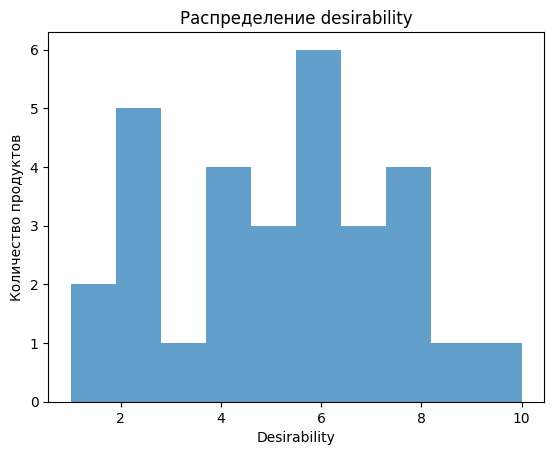

Итоговые значения за неделю:
Калории: 21353.31 ккал
Белки: 683.64 г
Жиры: 947.16 г
Углеводы: 2386.53 г


In [137]:
import pandas as pd

# Вывод общей информации
print("Общая информация о недельном меню:")
print(weekly_menu_df.describe())

# Визуализация распределения desirability
import matplotlib.pyplot as plt

plt.hist(weekly_menu_df["Desirability"], bins=10, alpha=0.7)
plt.title("Распределение desirability")
plt.xlabel("Desirability")
plt.ylabel("Количество продуктов")
plt.show()

# Анализ суммарных показателей
total_calories = weekly_menu_df["Calories"].sum()
total_protein = weekly_menu_df["Protein"].sum()
total_fat = weekly_menu_df["Fat"].sum()
total_carbs = weekly_menu_df["Carbs"].sum()

print("Итоговые значения за неделю:")
print(f"Калории: {total_calories:.2f} ккал")
print(f"Белки: {total_protein:.2f} г")
print(f"Жиры: {total_fat:.2f} г")
print(f"Углеводы: {total_carbs:.2f} г")


**Nutrient Deviation Score (NDS)**

Описание метрики: **Nutrient Deviation Score (NDS)** измеряет отклонение фактического потребления основных макронутриентов (калорий, белков, жиров и углеводов) от заданных целевых значений на неделю. Метрика помогает определить, насколько сбалансированным является рацион, и сигнализирует о перекосах в потреблении.

Описание ожидаемых значений:

**Идеальные значения**: Значения близки к нулю, что указывает на минимальное отклонение от целей.  
**Пагубные значения**: Высокие отклонения (>10% от целевого значения) указывают на несбалансированность рациона и необходимость корректировок.

Содержимое actual_menu_df:
                                    Product Name  Portion (g/ml)  Calories  \
0   Паштет Егорьевская ФКГ Мясной из печени 150г           150.0    331.50   
1                          Сочень с творогом 91г            91.0    346.71   
2           Напиток энергетический Gorilla 0.45л           450.0    234.00   
3          Мацони Ростагроэкспорт 3.2% БЗМЖ 300г           300.0    162.00   
4  Наггетсы Вязанка с индейкой замороженные 250г           250.0    625.00   

   Protein (g)  Fat (g)  Carbs (g)  Score  Desirability  
0        19.50   18.750      9.750   7.33           6.0  
1         7.28   16.653     41.951   6.67           2.0  
2         0.00    0.000     57.150   6.67           1.0  
3         8.40    9.600     10.800   7.33           6.0  
4        27.50   30.000     60.000   5.33           4.0  

Колонки actual_menu_df:
Index(['Product Name', 'Portion (g/ml)', 'Calories', 'Protein (g)', 'Fat (g)',
       'Carbs (g)', 'Score', 'Desirability'],
      

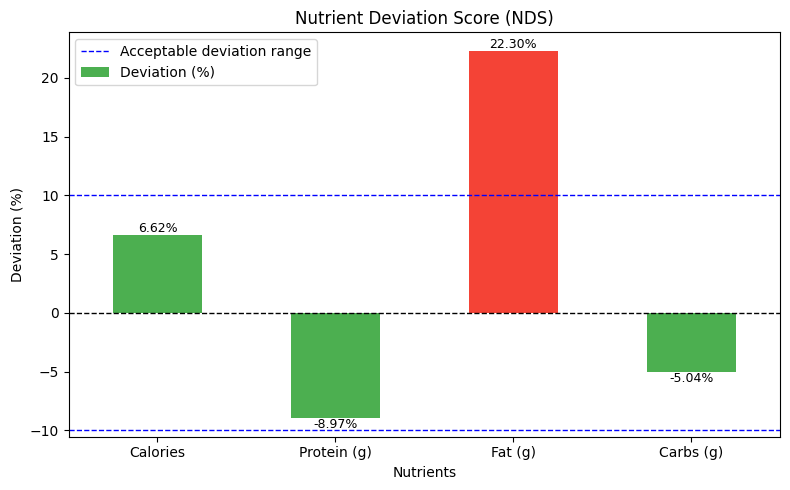

In [138]:
import pandas as pd
import matplotlib.pyplot as plt


# Преобразование данных weekly_menu в DataFrame
actual_menu_df = pd.DataFrame(weekly_menu)

# Нормализация названий колонок для соответствия с целевыми значениями
def normalize_column_names(df):
    column_mapping = {
        "Protein": "Protein (g)",
        "Fat": "Fat (g)",
        "Carbs": "Carbs (g)"
    }
    df = df.rename(columns=column_mapping)
    return df

# Приведение названий колонок к целевому формату
actual_menu_df = normalize_column_names(actual_menu_df)

# Проверка содержимого DataFrame
print("Содержимое actual_menu_df:")
print(actual_menu_df.head())  # Отображает первые 5 строк
print("\nКолонки actual_menu_df:")
print(actual_menu_df.columns)  # Отображает список колонок

# Функция для расчёта отклонений (NDS)
def calculate_nds_pandas(targets, actual_menu_df):
    # Суммируем фактические значения из weekly_menu
    actual_totals = actual_menu_df[["Calories", "Protein (g)", "Fat (g)", "Carbs (g)"]].sum()

    # Целевые значения из kbju_targets
    target_totals = pd.Series(targets["Weekly"])

    # Рассчитываем отклонения в процентах
    deviations = ((actual_totals - target_totals) / target_totals * 100).rename("Deviation (%)")

    return deviations, actual_totals

# Функция для визуализации отклонений (NDS)
def plot_nds_pandas(deviations):
    # Создаём бар-чарт
    plt.figure(figsize=(8, 5))
    bars = deviations.plot.bar(
        color=['#4CAF50' if -10 <= d <= 10 else '#F44336' for d in deviations],
        rot=0
    )

    # Добавляем линии допустимого отклонения
    plt.axhline(0, color="black", linewidth=1, linestyle="--")
    plt.axhline(10, color="blue", linewidth=1, linestyle="--", label="Acceptable deviation range")
    plt.axhline(-10, color="blue", linewidth=1, linestyle="--")

    # Подписи осей
    plt.xlabel("Nutrients")
    plt.ylabel("Deviation (%)")
    plt.title("Nutrient Deviation Score (NDS)")

    # Легенда
    plt.legend()

    # Добавляем значения на столбцы
    for bar in bars.patches:
        value = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            value,
            f"{value:.2f}%",
            ha="center",
            va="bottom" if value > 0 else "top",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

# Вычисление отклонений
deviations, actual_totals = calculate_nds_pandas(kbju_targets, actual_menu_df)

# Вывод отклонений
print("\nОтклонения (Deviation):")
print(deviations)

# Построение графика отклонений
plot_nds_pandas(deviations)


**Продуктовый баланс (ПБ)**

Описание метрики:  
**Продуктовый баланс (ПБ)** — это метрика, которая оценивает, насколько рацион пользователя сбалансирован с учётом желаемости продуктов. Он определяет, насколько рацион состоит из продуктов с высоким Desirability, что влияет на общий опыт и предпочтения при потреблении пищи. Смысл ПБ — оценить, как низкая желаемость продуктов может повлиять на баланс рациона в контексте потребностей в калориях, белках, жирах и углеводах.

**Цель**: Стремиться к максимально сбалансированному рациону, где продукты с высоким Desirability компенсируют продукты с низким уровнем желаемости.

**Принятые значения**:  
Идеальное значение: PB близок к 100% — рацион сбалансирован с учётом желаемых продуктов.
Значение ниже 100% может означать, что рацион в значительной степени состоит из менее желаемых продуктов, что снижает общее качество питания.

**Пагубные значения**:  
Если PB значительно ниже 50%, это означает, что рацион содержит больше продуктов с низким Desirability, что может негативно повлиять на восприятие рациона.

Продуктовый баланс (ПБ):
ПБ = 102.76%



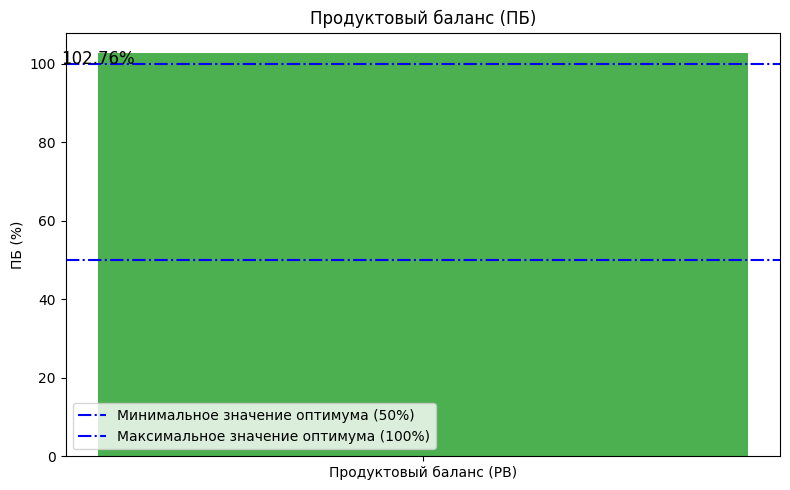

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Используем данные, которые уже были извлечены
# weekly_menu и kbju_targets определены заранее

# Преобразование данных weekly_menu в DataFrame
actual_menu_df = pd.DataFrame(weekly_menu)

# Нормализация названий колонок для соответствия с целевыми значениями
def normalize_column_names(df):
    column_mapping = {
        "Protein": "Protein (g)",
        "Fat": "Fat (g)",
        "Carbs": "Carbs (g)"
    }
    df = df.rename(columns=column_mapping)
    return df

# Приведение названий колонок к целевому формату
actual_menu_df = normalize_column_names(actual_menu_df)

# Целевые значения КБЖУ (берём из предварительно загруженных данных)
weekly_targets = kbju_targets["Weekly"]

# Функция для расчёта Продуктового баланса (PB)
def calculate_pb(kbju_targets, actual_menu_df):
    # Вычисляем относительное отклонение каждого макроэлемента от цели
    actual_menu_df['Weighted Desirability'] = actual_menu_df['Desirability'] * (
        actual_menu_df['Protein (g)'] / kbju_targets['Protein (g)'] +
        actual_menu_df['Fat (g)'] / kbju_targets['Fat (g)'] +
        actual_menu_df['Carbs (g)'] / kbju_targets['Carbs (g)']
    )

    # Суммируем макроэлементы
    total_actuals = actual_menu_df[['Protein (g)', 'Fat (g)', 'Carbs (g)']].sum()
    total_targets = pd.Series(kbju_targets)

    # Нормализуем PB как средний процент выполнения целей
    total_percent_achieved = (total_actuals / total_targets) * 100
    pb = total_percent_achieved.mean()  # Среднее значение по всем макроэлементам

    return pb, total_actuals

# Функция для визуализации Продуктового баланса (PB)
def plot_pb(pb):
    # Создаём бар-чарт для визуализации
    plt.figure(figsize=(8, 5))
    plt.bar(["Продуктовый баланс (PB)"], [pb], color='#4CAF50' if pb >= 50 else '#F44336')

    # Добавляем границы оптимума между 50% и 100%
    plt.axhline(y=50, color='blue', linestyle='dashdot', label="Минимальное значение оптимума (50%)")
    plt.axhline(y=100, color='blue', linestyle='dashdot', label="Максимальное значение оптимума (100%)")

    # Добавляем подписи
    plt.ylabel("ПБ (%)")
    plt.title("Продуктовый баланс (ПБ)")

    # Добавляем значения на столбцы
    plt.text(-0.4, pb - 4, f"{pb:.2f}%", ha="center", va="bottom", fontsize=12)

    # Добавляем легенду
    plt.legend()

    plt.tight_layout()
    plt.show()

# Вычисление Продуктового баланса (ПБ)
pb, total_actuals = calculate_pb(weekly_targets, actual_menu_df)

# Вывод Продуктового баланса (PB)
print("Продуктовый баланс (ПБ):")
print(f"ПБ = {pb:.2f}%\n")

# Построение графика Продуктового баланса (PB)
plot_pb(pb)


Название: **Macro Balance Score**  
**МБС (Macro Balance Score)** – это метрика, которая оценивает сбалансированность соотношения калорий, белков, жиров и углеводов в диете. Хорошая сбалансированность предполагает, что потребление каждого макроэлемента находится в пределах нормальных диапазонов относительно общей калорийности.  
**Ожидаемые значения**:  
100% – идеальное сбалансированное питание, где макроэлементы находятся в оптимальном соотношении.  
50–100% – допустимый диапазон. Если значение ниже 50%, это сигнализирует о сильном перекосе в составе питания.  
Меньше 50% – очень плохая сбалансированность.


Macro Balance Score (MBS): 95.73%

Deviations from Target Ratios:
Protein: 2.19%
Fat: 5.12%
Carbs: 5.49%


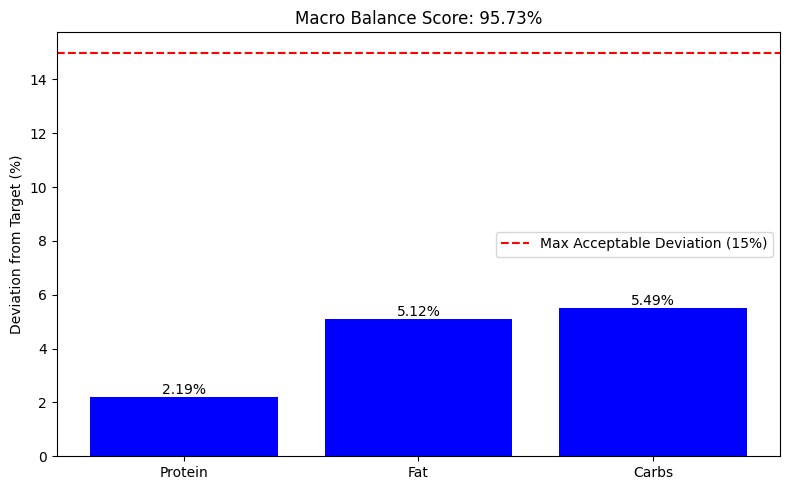

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование данных в DataFrame
weekly_menu_df = pd.DataFrame(weekly_menu)

# Подготовка данных из kbju_targets
kbju_targets_df = pd.DataFrame(kbju_targets).T  # Транспонирование для удобства работы

# Извлечение целевых значений
weekly_targets_df = kbju_targets_df.loc["Weekly"]
target_totals = {
    "Calories": weekly_targets_df["Calories"],
    "Protein": weekly_targets_df["Protein (g)"],
    "Fat": weekly_targets_df["Fat (g)"],
    "Carbs": weekly_targets_df["Carbs (g)"],
}

# Проверка на наличие необходимых столбцов в weekly_menu_df
required_columns = ["Calories", "Protein", "Fat", "Carbs"]
if not set(required_columns).issubset(weekly_menu_df.columns):
    raise ValueError("Missing required columns in weekly_menu_df!")

# Суммирование фактических значений
actual_totals = weekly_menu_df[required_columns].sum()

# Расчёт фактического распределения макроэлементов в процентах
actual_ratios = {
    "Protein": (actual_totals["Protein"] * 4 / actual_totals["Calories"]) * 100,
    "Fat": (actual_totals["Fat"] * 9 / actual_totals["Calories"]) * 100,
    "Carbs": (actual_totals["Carbs"] * 4 / actual_totals["Calories"]) * 100,
}

# Целевые диапазоны распределения макроэлементов (в процентах от калорийности)
target_ratios = {
    "Protein": (target_totals["Protein"] * 4 / target_totals["Calories"]) * 100,
    "Fat": (target_totals["Fat"] * 9 / target_totals["Calories"]) * 100,
    "Carbs": (target_totals["Carbs"] * 4 / target_totals["Calories"]) * 100,
}

# Расчёт отклонений (разница в процентах от целевых значений)
deviations = {
    nutrient: abs(actual_ratios[nutrient] - target_ratios[nutrient])
    for nutrient in actual_ratios
}

# MBS: 100% минус среднее отклонение (чем меньше отклонение, тем выше результат)
mbs = 100 - sum(deviations.values()) / len(deviations)

# Графическая визуализация
def plot_mbs(mbs, deviations):
    labels = list(deviations.keys())
    values = list(deviations.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color='blue')

    # Подписи значений на столбцах
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f"{value:.2f}%", ha='center', va='bottom')

    plt.axhline(15, color='red', linestyle='--', label="Max Acceptable Deviation (15%)")
    plt.title(f"Macro Balance Score: {mbs:.2f}%")
    plt.ylabel("Deviation from Target (%)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Вывод результатов
print(f"Macro Balance Score (MBS): {mbs:.2f}%")
print("\nDeviations from Target Ratios:")
for nutrient, deviation in deviations.items():
    print(f"{nutrient}: {deviation:.2f}%")

# Построение графика
plot_mbs(mbs, deviations)


Название метрики: **Target Coverage Ratio (TCR)**  
Описание метрики:  
**Target Coverage Ratio (TCR)** — это метрика, которая оценивает, насколько рацион питания (еженедельное меню) покрывает целевые значения калорий и макроэлементов, указанные в файле kbju_targets.json. Метрика рассчитывается для каждой категории: калорий, белков, жиров и углеводов.

Для каждой категории определяется отношение фактического суммарного значения из weekly_menu.json к целевому значению из kbju_targets.json. Итоговая метрика рассчитывается как среднее покрытие по всем категориям.

Ожидаемые принятые значения:
Оптимальные значения: 100% для всех категорий (каждое целевое значение покрыто полностью).
Допустимые отклонения: 90%-110% (легкие отклонения приемлемы).
Пагубные значения: менее 90% или более 110% (сильно недоедено или переедено).

Интерпретация:
Если TCR ≈ 100%: Рацион полностью покрывает целевые показатели.
Если TCR < 90%: Возможно, дефицит питания по некоторым категориям.
Если TCR > 110%: Перебор калорий или макроэлементов, что может быть неэффективно или вредно.

Target Coverage Ratio (TCR):
Calories: 106.62%
Protein (g): 91.03%
Fat (g): 122.30%
Carbs (g): 94.96%
Overall TCR: 103.73%


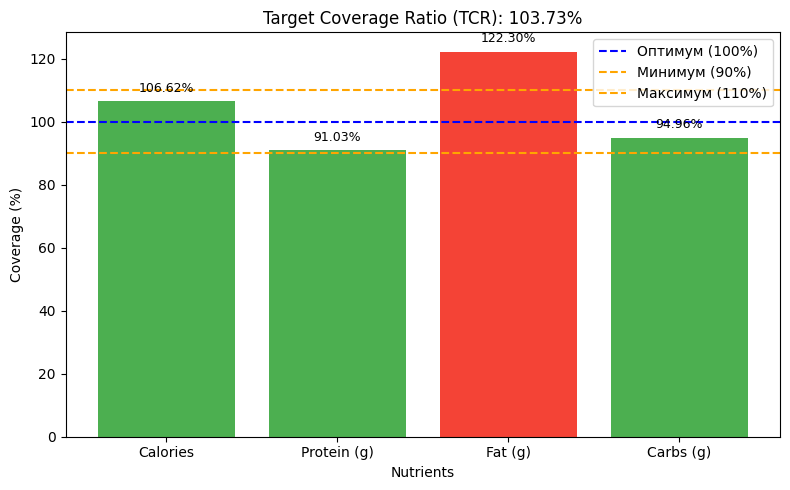

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Функция для расчёта метрики Target Coverage Ratio (TCR)
def calculate_tcr(kbju_targets, weekly_menu):
    # Суммируем значения калорий, белков, жиров и углеводов из weekly_menu
    weekly_totals = {
        "Calories": sum(item.get("Calories", 0) for item in weekly_menu),
        "Protein (g)": sum(item.get("Protein", 0) for item in weekly_menu),
        "Fat (g)": sum(item.get("Fat", 0) for item in weekly_menu),
        "Carbs (g)": sum(item.get("Carbs", 0) for item in weekly_menu),
    }

    # Целевые значения из kbju_targets
    target_totals = kbju_targets["Weekly"]

    # Рассчитываем TCR для каждой категории
    tcr_values = {
        key: (weekly_totals[key] / target_totals[key]) * 100
        for key in weekly_totals
    }

    # Общий TCR как среднее покрытие
    overall_tcr = sum(tcr_values.values()) / len(tcr_values)

    return tcr_values, overall_tcr

# Функция визуализации TCR
def plot_tcr(tcr_values, overall_tcr):
    # Создаём бар-чарт для каждой категории
    plt.figure(figsize=(8, 5))
    labels = list(tcr_values.keys())
    values = list(tcr_values.values())

    # Цвета для баров
    colors = ['#4CAF50' if 90 <= v <= 110 else '#F44336' for v in values]

    plt.bar(labels, values, color=colors)

    # Добавляем линию оптимума
    plt.axhline(y=100, color='blue', linestyle='--', label="Оптимум (100%)")
    plt.axhline(y=90, color='orange', linestyle='--', label="Минимум (90%)")
    plt.axhline(y=110, color='orange', linestyle='--', label="Максимум (110%)")

    # Добавляем подписи
    plt.xlabel("Nutrients")
    plt.ylabel("Coverage (%)")
    plt.title(f"Target Coverage Ratio (TCR): {overall_tcr:.2f}%")

    # Добавляем значения на столбцы
    for i, v in enumerate(values):
        plt.text(i, v + 2, f"{v:.2f}%", ha="center", va="bottom", fontsize=9)

    # Легенда
    plt.legend()

    plt.tight_layout()
    plt.show()

# Расчёт TCR
tcr_values, overall_tcr = calculate_tcr(kbju_targets, weekly_menu)

# Вывод результатов
print("Target Coverage Ratio (TCR):")
for nutrient, value in tcr_values.items():
    print(f"{nutrient}: {value:.2f}%")
print(f"Overall TCR: {overall_tcr:.2f}%")

# Построение графика TCR
plot_tcr(tcr_values, overall_tcr)

СОЗДАНИЕ СВОДНОГО ДЭШБОРДА

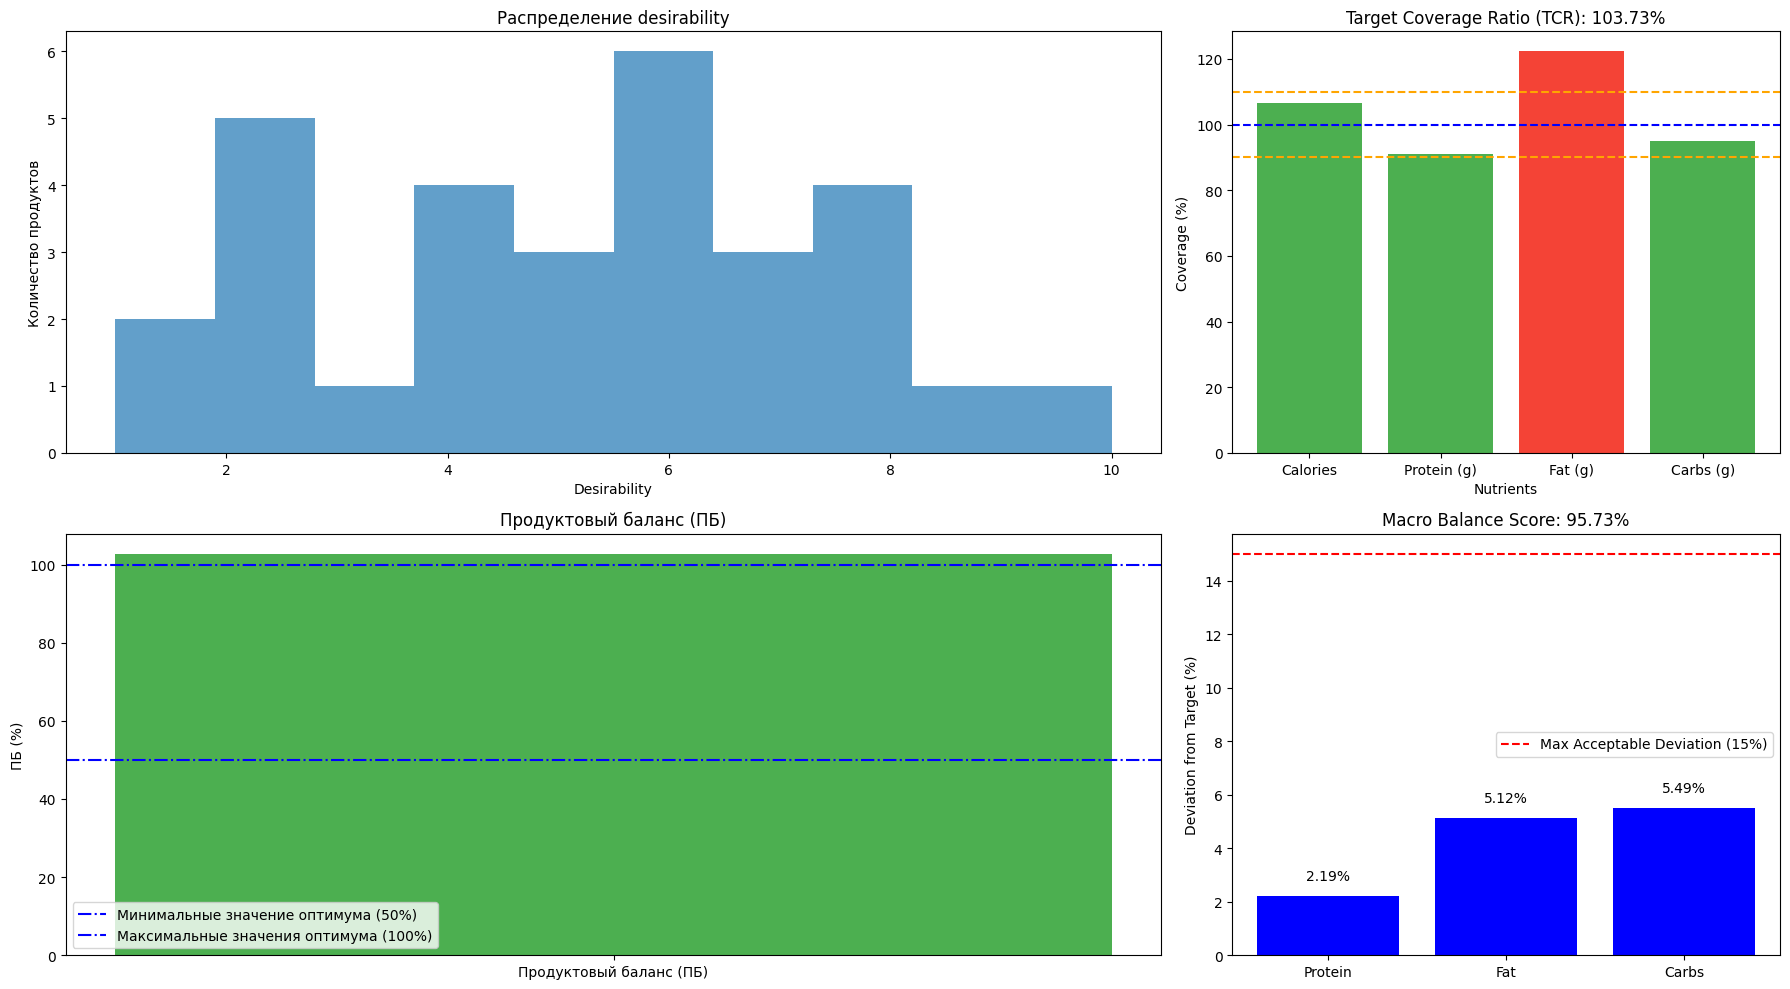

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Подготовка данных
fig, axs = plt.subplots(2, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [2, 1]})  # Установим ширину для столбцов
fig.subplots_adjust(wspace=0.3)  # Увеличиваем пространство между графиками

# График 1: Распределение desirability
axs[0, 0].hist(weekly_menu_df["Desirability"], bins=10, alpha=0.7)
axs[0, 0].set_title("Распределение desirability")
axs[0, 0].set_xlabel("Desirability")
axs[0, 0].set_ylabel("Количество продуктов")

# График 3: Продуктовый баланс (PB)
axs[1, 0].bar(["Продуктовый баланс (ПБ)"], [pb], color='#4CAF50' if pb >= 50 else '#F44336')
axs[1, 0].axhline(y=50, color='blue', linestyle='dashdot', label="Минимальные значение оптимума (50%)")
axs[1, 0].axhline(y=100, color='blue', linestyle='dashdot', label="Максимальные значения оптимума (100%)")
axs[1, 0].set_ylabel("ПБ (%)")
axs[1, 0].set_title("Продуктовый баланс (ПБ)")
axs[1, 0].legend()

# График 4: Macro Balance Score (MBS)

axs[1,1].bar(deviations.keys(), deviations.values(), color="blue")
axs[1,1].axhline(15, color="red", linestyle="--", label="Max Acceptable Deviation (15%)")
axs[1,1].set_title(f"Macro Balance Score: {mbs:.2f}%")
axs[1,1].set_ylabel("Deviation from Target (%)")
axs[1,1].legend()

for i, v in enumerate(deviations.values()):
     axs[1,1].text(i, v + 0.5, f"{v:.2f}%", ha="center", va="bottom")

# График 5: Target Coverage Ratio (TCR)
# Цвета для баров
colors_tcr = ['#4CAF50' if 90 <= v <= 110 else '#F44336' for v in values_tcr]

axs[0, 1].bar(labels_tcr, values_tcr, color=colors_tcr)

# Добавляем линии оптимума
axs[0, 1].axhline(y=100, color='blue', linestyle='--', label="Оптимум (100%)")
axs[0, 1].axhline(y=90, color='orange', linestyle='--', label="Минимум (90%)")
axs[0, 1].axhline(y=110, color='orange', linestyle='--', label="Максимум (110%)")

# Добавляем подписи
axs[0, 1].set_xlabel("Nutrients")
axs[0, 1].set_ylabel("Coverage (%)")
axs[0, 1].set_title(f"Target Coverage Ratio (TCR): {overall_tcr:.2f}%")

# Добавляем значения на столбцы
for i, v in enumerate(values_tcr):
    ax5.text(i, v + 2, f"{v:.2f}%", ha="center", va="bottom", fontsize=9)

# Легенда
ax5.legend()

# Общая настройка для всех графиков
plt.tight_layout()
plt.show()